
1. Load the Corn 3-Classes image dataset. 
2. Preprocess the images: \
    a. Resize images to a fixed size (e.g., 224×224) \
    b. Normalize pixel values. 
3. Split the dataset into training and testing sets. 
4. Create a CNN model using: \
    a. Convolution layer \
    b. Max Pooling layer \
    c. Flatten layer \
    d. Dense layer 
5. Train the CNN model for multi-class classification. 
6. Test the model on unseen images. 
7. Plot graphs: \
    a. Training vs Validation Accuracy \
    b. Training vs Validation Loss (Error)


In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

2026-01-06 12:39:09.095358: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 12:39:09.102589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767683349.111243  227125 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767683349.113840  227125 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767683349.120493  227125 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_dataset = image_dataset_from_directory(
    'Data/Corn_3_Classes_Image_Dataset',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=123
)

val_dataset = image_dataset_from_directory(
    'Data/Corn_3_Classes_Image_Dataset',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=123
)

classes = train_dataset.class_names
print("Classes:", classes)


Found 1050 files belonging to 3 classes.
Using 840 files for training.


I0000 00:00:1767683350.500896  227125 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9286 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1050 files belonging to 3 classes.
Using 210 files for validation.
Classes: ['Zea_mays_Chulpi_Cancha', 'Zea_mays_Indurata', 'Zea_mays_Rugosa']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten , BatchNormalization
from tensorflow.keras.optimizers import Adam

In [5]:
model = Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1./255),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

In [6]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10


I0000 00:00:1767683351.776831  227337 service.cc:152] XLA service 0x7f1c8400bae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767683351.776852  227337 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2026-01-06 12:39:11.791202: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1767683351.865194  227337 cuda_dnn.cc:529] Loaded cuDNN version 91701


 5/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5364 - loss: 0.9860

I0000 00:00:1767683354.483140  227337 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8236 - loss: 0.4718

2026-01-06 12:39:17.292341: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 4 bytes spill stores, 4 bytes spill loads



27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8277 - loss: 0.4622 - val_accuracy: 0.9857 - val_loss: 0.0202
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9961 - loss: 0.0114 - val_accuracy: 0.9952 - val_loss: 0.0046
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9960 - loss: 0.0198 - val_accuracy: 0.9952 - val_loss: 0.0112
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 8.0215e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 4.6605e-04 - val_accuracy: 1.0000 - val_loss: 9.8933e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 1.0943e-04 - val_accuracy: 1.0000 - val_loss: 4.7261e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 4.5000e-05 - val_accuracy: 1.0000 - val_loss: 4.1222e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 3.7742e-05 - va

In [8]:
train_losses = history.history['loss']
train_accuracies = history.history['accuracy']

val_losses = history.history['val_loss']
val_accuracies = history.history['val_accuracy']

In [10]:
x = np.arange(1, len(train_losses) + 1)

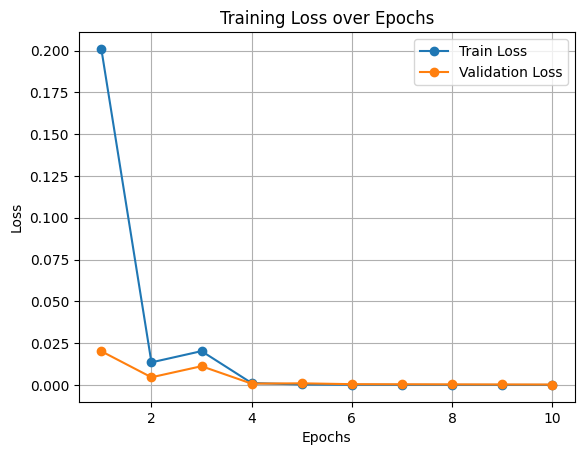

In [11]:
import matplotlib.pyplot as plt
plt.plot(x, train_losses, label='Train Loss', marker='o')
plt.plot(x, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

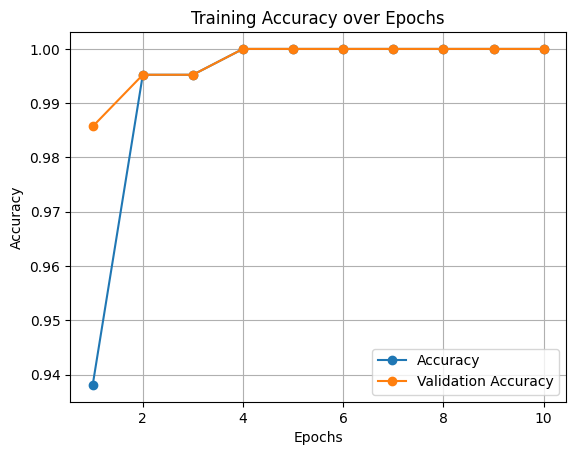

In [12]:
plt.plot(x, train_accuracies, label='Accuracy', marker='o')
plt.plot(x, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()